In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

BASE_PATH = "../"
# Load some data (patients in lessons)
admissions = pd.read_csv(f'{BASE_PATH}data/ADMISSIONS.csv')
patients = pd.read_csv(f'{BASE_PATH}data/PATIENTS.csv')
transfer = pd.read_csv(f'{BASE_PATH}data/TRANSFERS.csv')
prescriptions = pd.read_csv(f'{BASE_PATH}data/PRESCRIPTIONS.csv', low_memory=False)

In [2]:
# Calculate age function
def calculate_age(dob, dod):
    dob_fixed = dob if str(dod) == 'nan' else dod
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(str(dob_fixed), "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

df = patients
# Apply calculate_age function to create "age" column
df["age"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)
# Filter out ages greater than 120 and less than 0
filtered_df = df[df["age"] < 120]
filtered_df = filtered_df[filtered_df["age"] > 0]
patients_with_age = pd.merge(admissions, filtered_df, on="SUBJECT_ID")


patient_prescriptions = pd.merge(patients, prescriptions, on='SUBJECT_ID')
ppa_no_age = pd.merge(patient_prescriptions, admissions, on='SUBJECT_ID')
df2 = ppa_no_age
df2["age"] = df.apply(lambda row: calculate_age(row["DOB"], row["DOD"]), axis=1)
# Filter out ages greater than 120 and less than 0
ppa = df2[df2["age"] < 120]
ppa = ppa[ppa["age"] > 0]

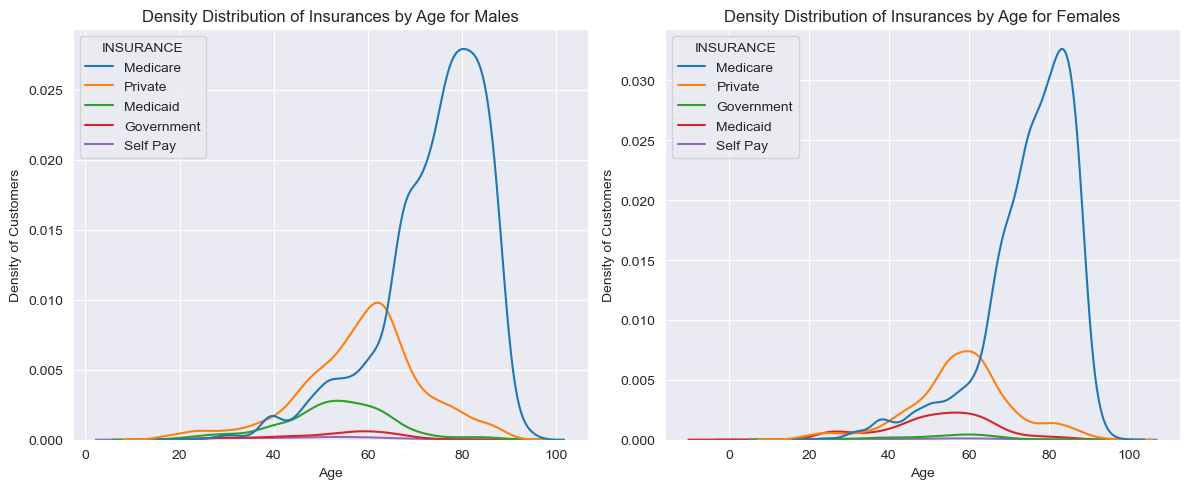

In [3]:
males = patients_with_age[patients_with_age['GENDER'] == 'M']
females = patients_with_age[patients_with_age['GENDER'] == 'F']
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.kdeplot(data=males, x='age', hue='INSURANCE')
plt.title('Density Distribution of Insurances by Age for Males')
plt.xlabel('Age')
plt.ylabel('Density of Customers')

plt.subplot(1,2,2)
sns.kdeplot(data=females, x='age', hue='INSURANCE')
plt.title('Density Distribution of Insurances by Age for Females')
plt.xlabel('Age')
plt.ylabel('Density of Customers')

plt.tight_layout()
plt.show()

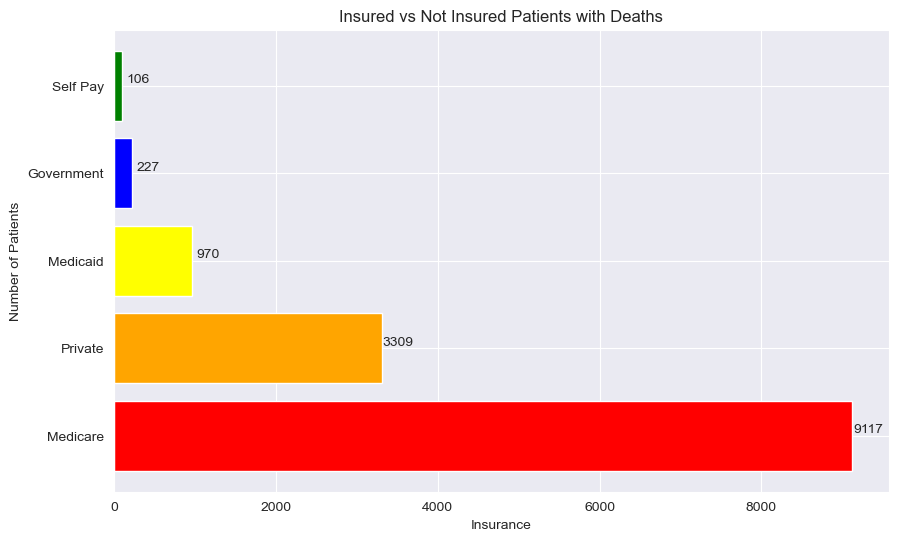

In [4]:
# Get all data with a death and with insurance
filtered_df = patients_with_age[patients_with_age['DOD_HOSP'].notna()]
filtered_df = filtered_df[filtered_df['INSURANCE'].notna()]
insured_count = len(filtered_df)
not_insured_count = len(patients_with_age) - insured_count

flt = filtered_df.groupby(['INSURANCE'])
insurances = flt['INSURANCE'].value_counts()
insurances = insurances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(insurances.index, insurances.values, color=['Red', 'Orange', 'Yellow', 'Blue', 'Green'], )

# Add num of patients to each bar in the chart.
for bar in bars:
    plt.text(bar.get_width()+ 200, bar.get_y() + bar.get_height() / 2, bar.get_width(), ha='center', va='bottom')

plt.title('Insured vs Not Insured Patients with Deaths')
plt.xlabel('Insurance')
plt.ylabel('Number of Patients')
plt.show()

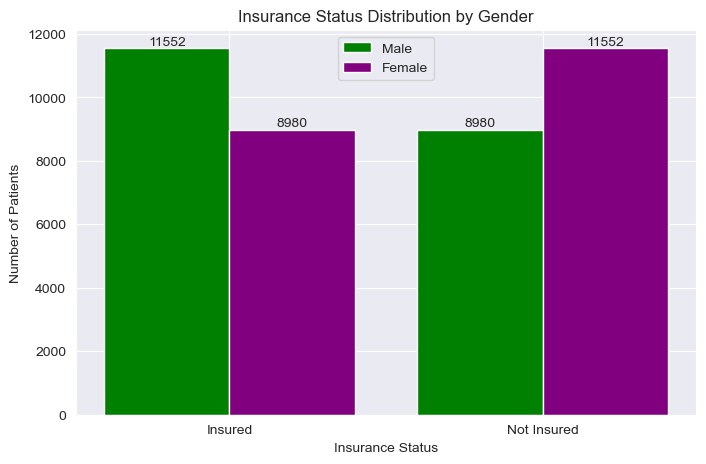

In [5]:
males = patients_with_age[patients_with_age['GENDER'] == 'M']
females = patients_with_age[patients_with_age['GENDER'] == 'F']

# Get the number of insured and not insured for each gender
males_insured = len(males)
males_not_insured = len(patients_with_age) - males_insured
females_insured = len(females)
females_not_insured = len(patients_with_age) - females_insured

categories = ['Insured', 'Not Insured']
male_counts = [males_insured, males_not_insured]
female_counts = [females_insured, females_not_insured]

bar_width = 0.4
x = np.arange(len(categories))

plt.figure(figsize=(8,5))
bars_m = plt.bar(x - bar_width/2, male_counts, width=bar_width, label='Male', color='Green')
bars_f = plt.bar(x + bar_width/2, female_counts, width=bar_width, label='Female', color='Purple')

for bar in bars_m + bars_f:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(), ha='center', va='bottom')

plt.xticks(x, categories)
plt.title('Insurance Status Distribution by Gender')
plt.xlabel('Insurance Status')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

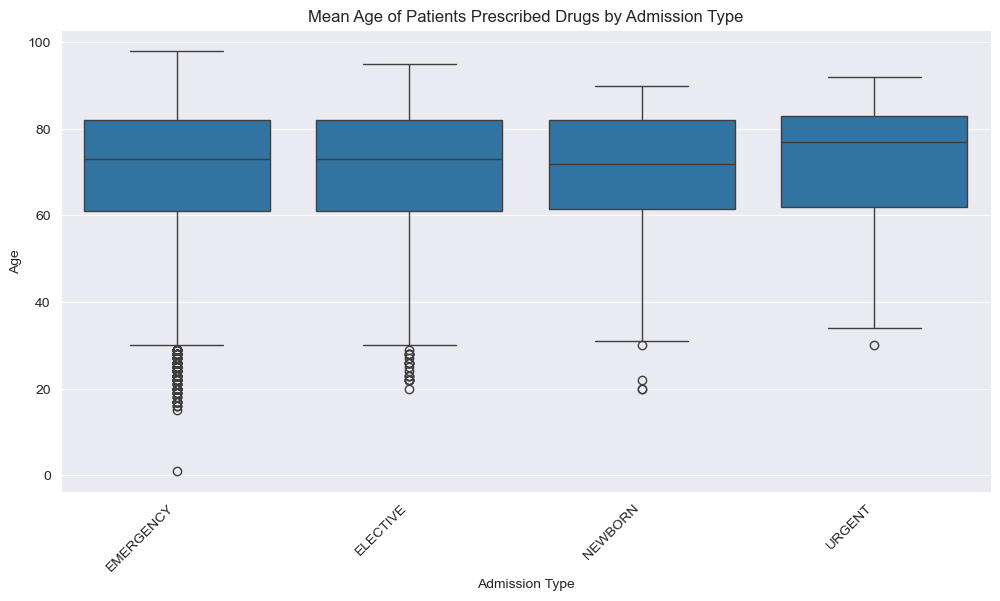

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ppa, x='ADMISSION_TYPE', y='age')
plt.title('Mean Age of Patients Prescribed Drugs by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Age')
plt.xticks(rotation=45, ha='right')
plt.show()

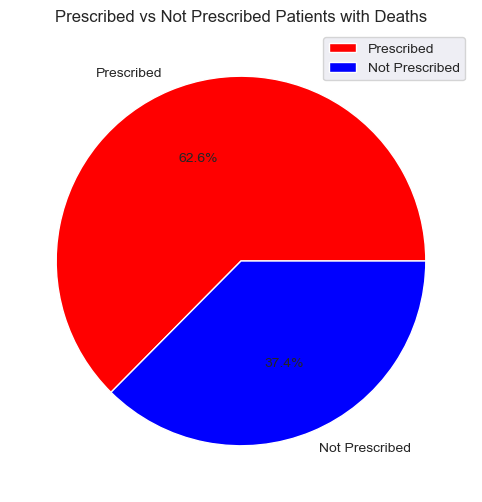

In [8]:
# Get the number of patients with prescriptions and deaths
filtered_df = patients_with_age[patients_with_age['DOD_HOSP'].notna()]
filtered_df = filtered_df[filtered_df['SUBJECT_ID'].isin(prescriptions['SUBJECT_ID'])]
prescribed_count = len(filtered_df)
not_prescribed_count = len(patients_with_age) - prescribed_count

plt.figure(figsize=(10, 6))
plt.pie([prescribed_count, not_prescribed_count], labels=['Prescribed', 'Not Prescribed'], autopct='%1.1f%%', colors=['Red', 'Blue'])
plt.title('Prescribed vs Not Prescribed Patients with Deaths')
plt.legend()
plt.show()